<a href="https://colab.research.google.com/github/CarlosSantos99/Curso_Python/blob/main/Curso_Python_para_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Python para finanças

## Parte - 1 Visualização de dados financeiros.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...
2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002
2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003
2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995


In [ ]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

In [ ]:
acoes_df.columns[0:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [ ]:
acoes_df.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998


In [ ]:
acoes_df.isnull().sum()

,0
GOL,0
CVC,0
WEGE,0
MGLU,0
TOTS,0
BOVA,27


In [ ]:
acoes_df.shape

(2421, 6)

In [ ]:
acoes_df.dropna(inplace=True)

In [ ]:
acoes_df.shape

(2394, 6)

In [ ]:
acoes_df.isnull().sum()

,0
GOL,0
CVC,0
WEGE,0
MGLU,0
TOTS,0
BOVA,0


In [ ]:
acoes_df.to_csv('acoes.csv')

In [ ]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997


In [ ]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [ ]:
acoes_df.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,13.476921,19.548610,21.044941,56.205099,19.992693,88.106111
std,9.354645,14.157353,14.324139,66.951523,9.603685,25.868508
min,0.980000,1.710000,4.942307,0.286077,7.138862,36.450001
25%,6.722500,9.178933,7.330769,9.234491,10.322476,63.235001
50%,10.675000,16.029711,14.617500,29.883580,19.211131,94.800003
75%,19.510000,29.087710,35.599998,67.337433,28.809216,109.615002
max,43.790001,53.407486,54.200001,256.746246,40.500488,133.619995


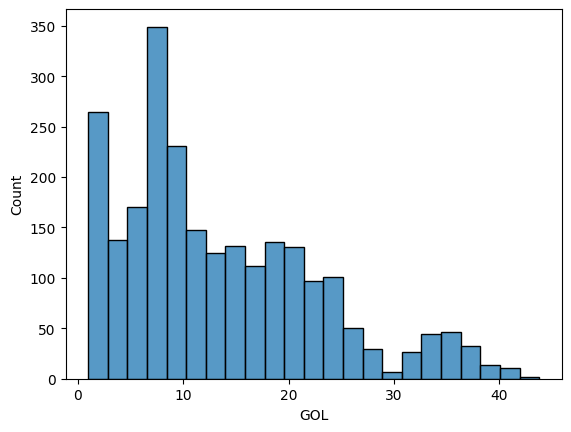

In [ ]:
sns.histplot(acoes_df['GOL']);

In [ ]:
len(acoes_df.columns)

7

In [ ]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6])

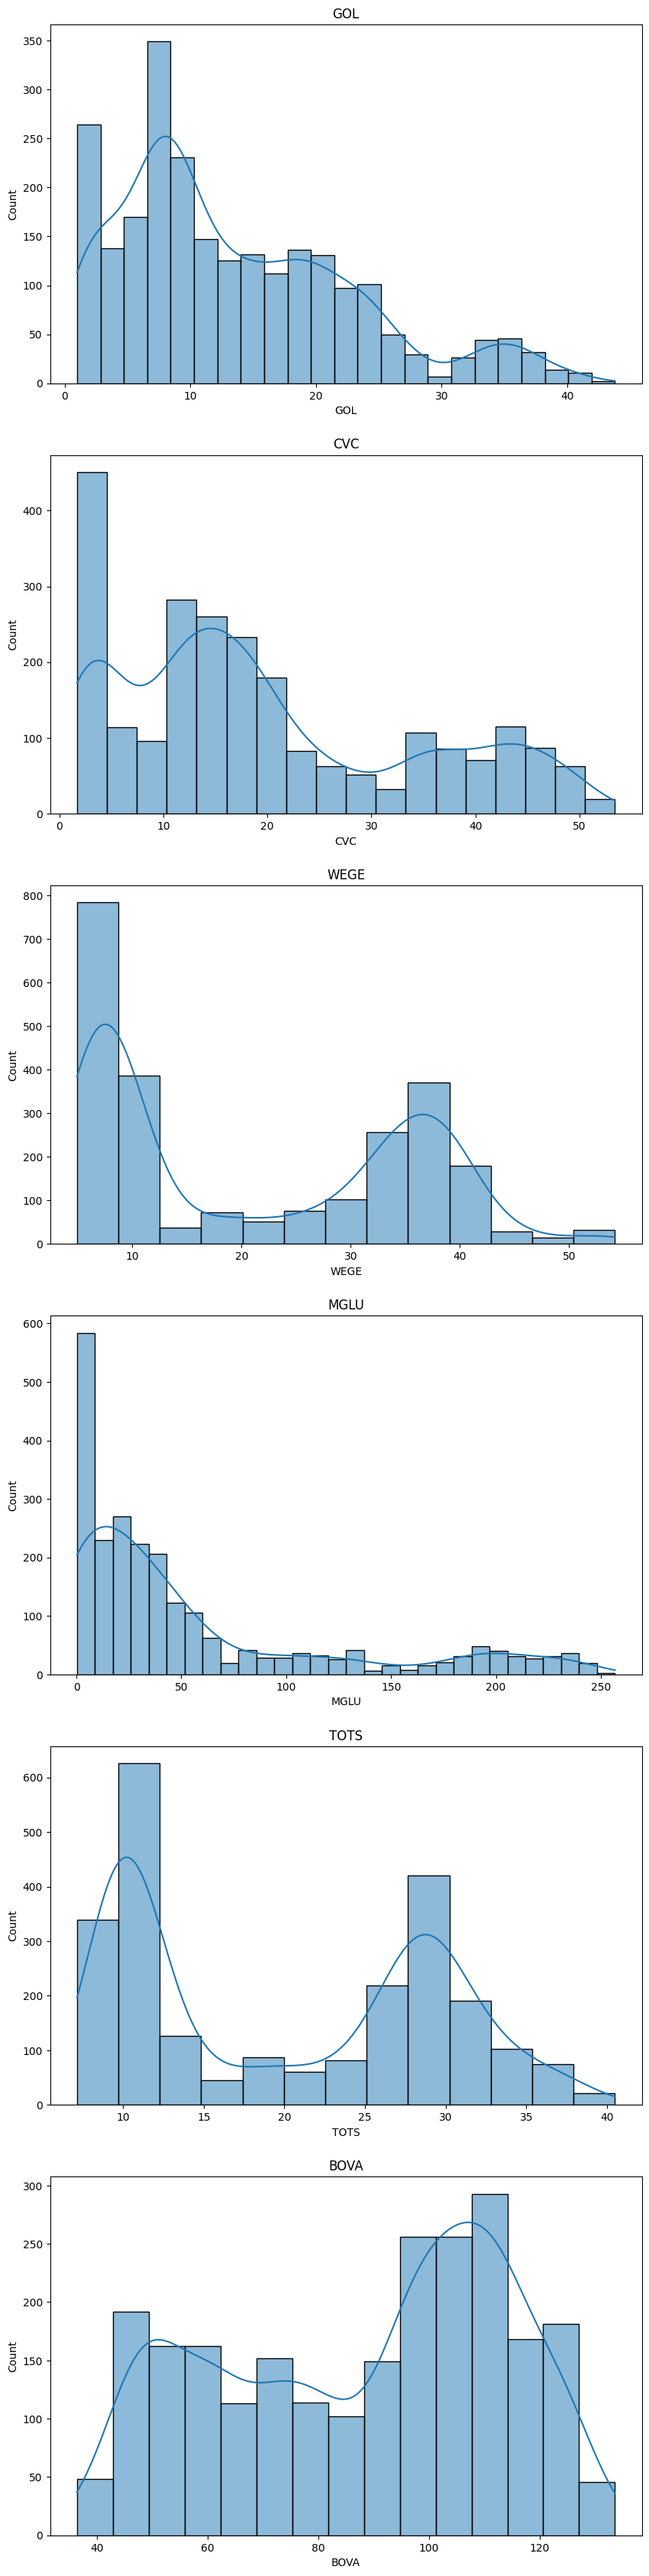

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

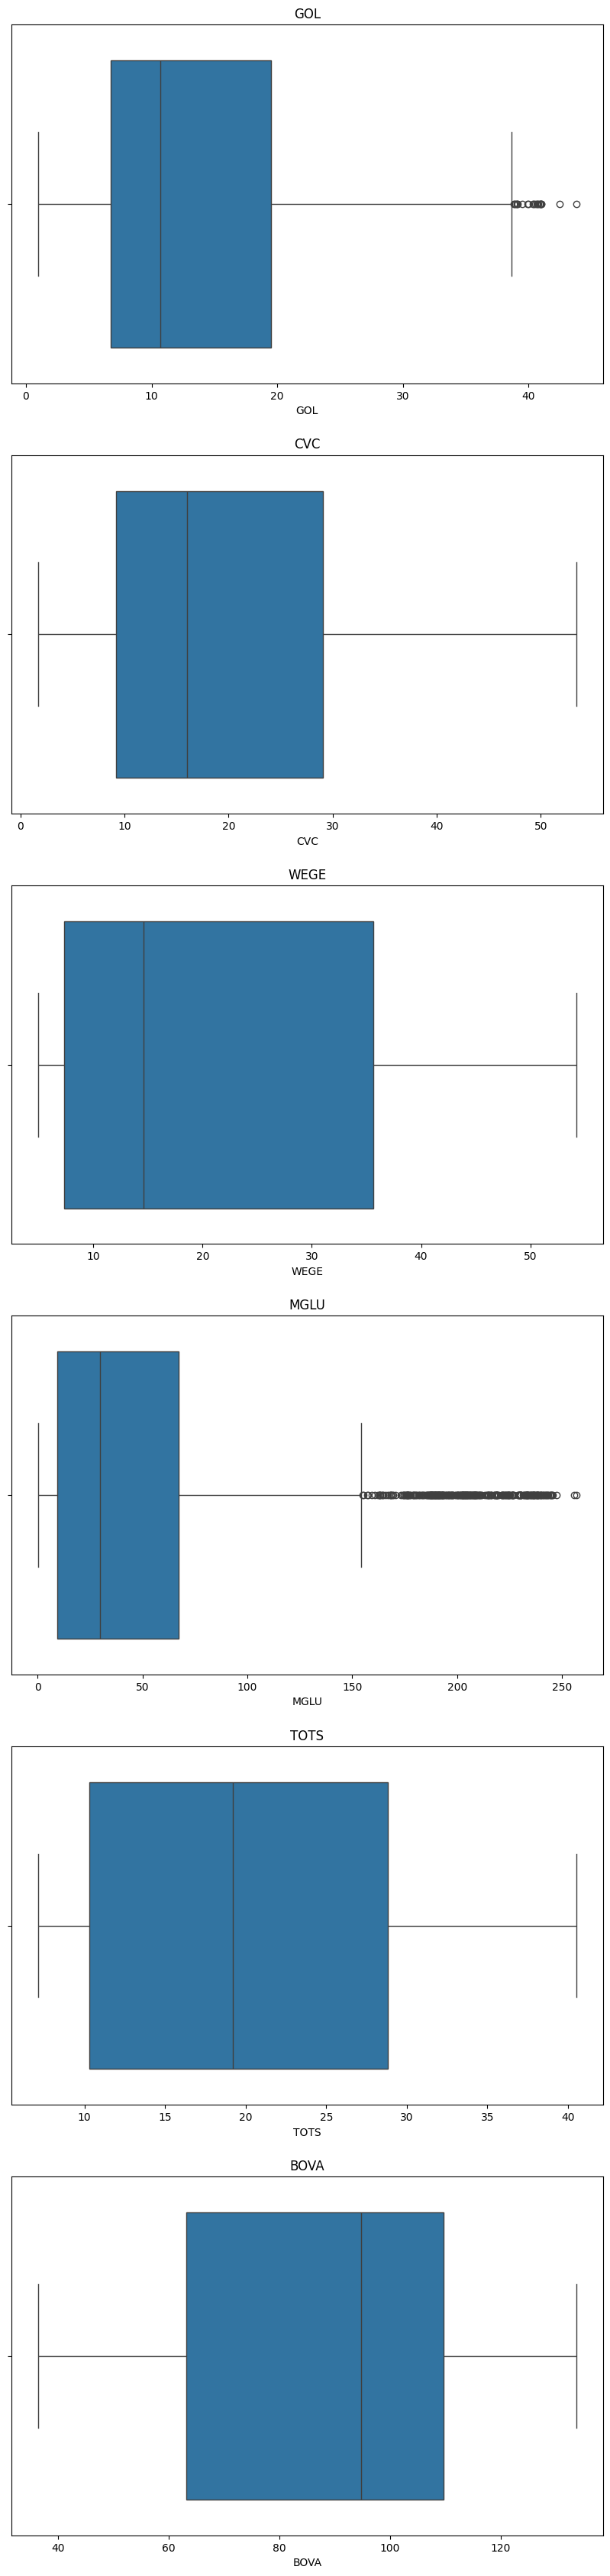

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

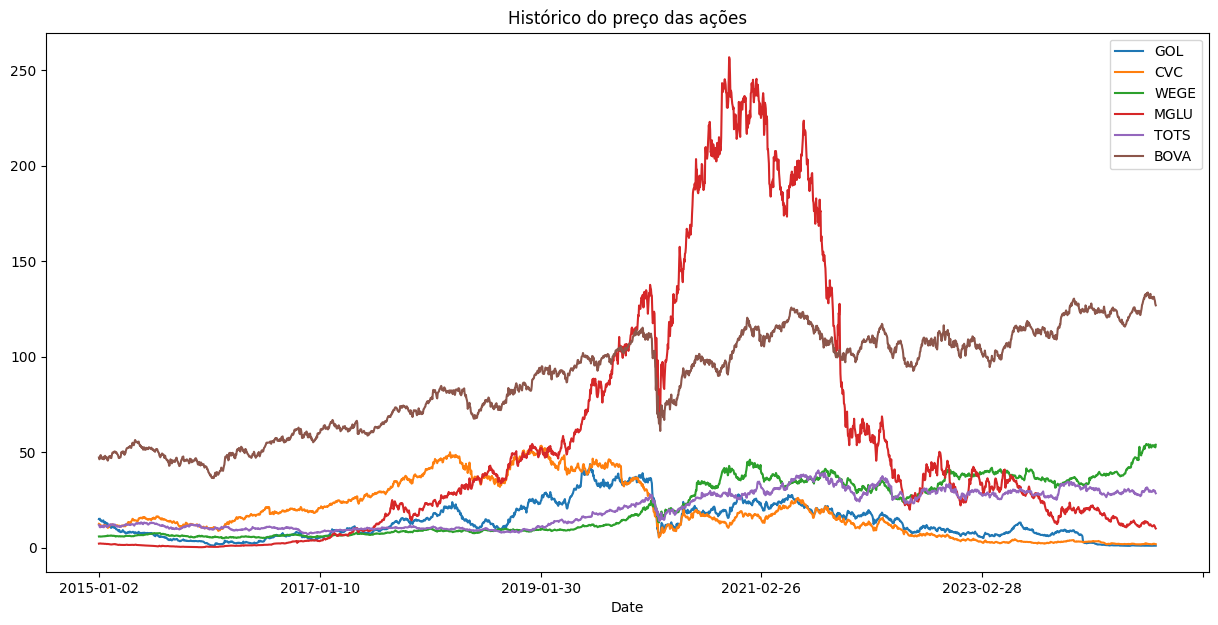

In [ ]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

In [ ]:
acoes_df

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997


In [ ]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [ ]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449
...,...,...,...,...,...,...,...
2389,2024-09-17,0.074049,0.166831,9.002079,5.455676,2.523248,2.778883
2390,2024-09-18,0.076051,0.165234,9.049352,5.290352,2.493791,2.751799
2391,2024-09-19,0.075384,0.160445,8.991949,5.125028,2.507257,2.737410
2392,2024-09-20,0.072715,0.149269,8.867014,4.753051,2.436559,2.700593


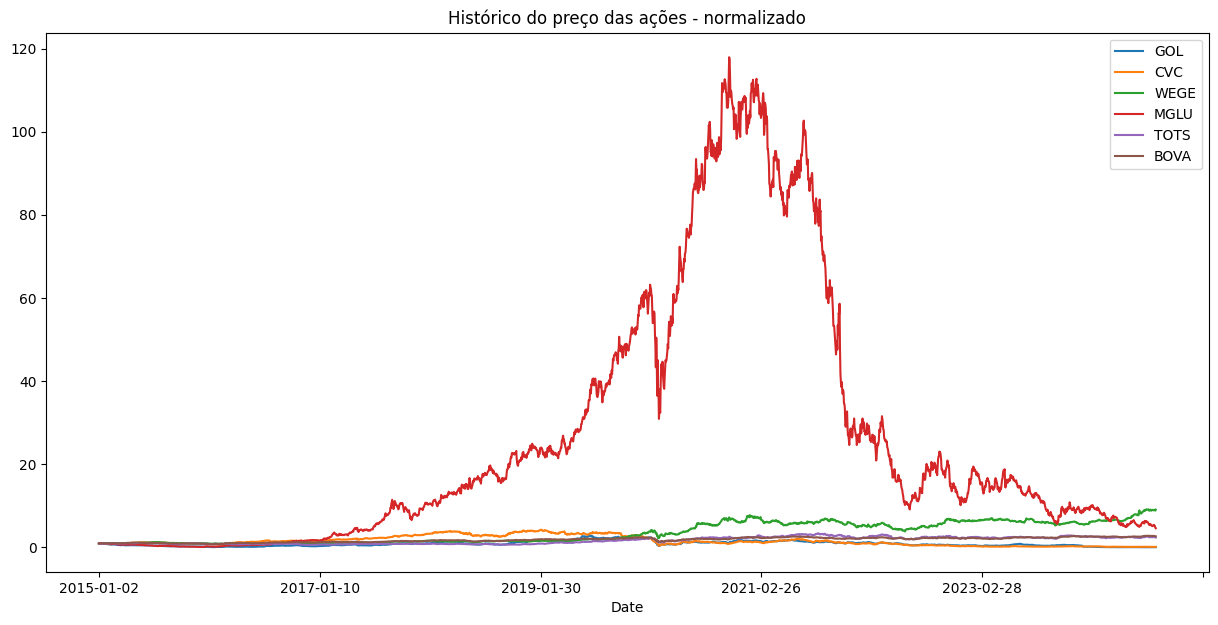

In [ ]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [ ]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

## Parte - 2 Taxas de retorno.


In [ ]:
dataset = pd.read_csv('acoes.csv')

In [ ]:
dataset = pd.read_csv('acoes.csv')

In [ ]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997


In [ ]:
len(dataset)

2394

In [ ]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 1.0800000429153442)

In [ ]:
((dataset['GOL'][len(dataset) - 1] - dataset['GOL'][0]) / dataset['GOL'][0]) * 100

-92.79519640156217

In [ ]:
((dataset['CVC'][len(dataset) - 1] - dataset['CVC'][0]) / dataset['CVC'][0]) * 100

-85.07305580004486

In [ ]:
((dataset['WEGE'][len(dataset) - 1] - dataset['WEGE'][0]) / dataset['WEGE'][0]) * 100

810.3377498099882

In [ ]:
((dataset['MGLU'][len(dataset) - 1] - dataset['MGLU'][0]) / dataset['MGLU'][0]) * 100

363.82427735336034

In [ ]:
((dataset['TOTS'][len(dataset) - 1] - dataset['TOTS'][0]) / dataset['TOTS'][0]) * 100

139.95267230054975

In [ ]:
((dataset['BOVA'][len(dataset) - 1] - dataset['BOVA'][0]) / dataset['BOVA'][0]) * 100

168.49344878591162

In [ ]:
(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0] - 1) * 100

168.4934487859116

In [ ]:
dataset['GOL']

,GOL
0,14.99
1,14.85
2,15.21
3,14.55
4,14.27
...,...
2389,1.11
2390,1.14
2391,1.13
2392,1.09


In [ ]:
dataset['GOL'].shift(2)

,GOL
0,NaN
1,NaN
2,14.99
3,14.85
4,15.21
...,...
2389,1.09
2390,1.09
2391,1.11
2392,1.14


In [ ]:
dataset['RS GOL'] = (dataset['GOL'] / dataset['GOL'].shift(1)) - 1

In [ ]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002,0.018349
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003,0.027027
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995,-0.008772
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997,-0.035398


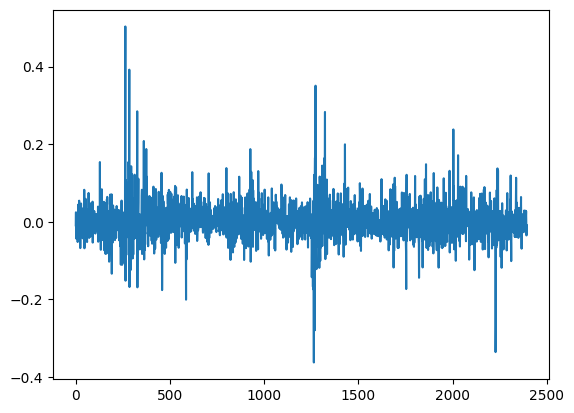

In [ ]:
dataset['RS GOL'].plot();

In [ ]:
dataset['RS GOL'].mean()

5.548411976233518e-05

In [ ]:
dataset.head(246)

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244
...,...,...,...,...,...,...,...,...
241,2015-12-23,2.46,10.285886,5.980769,0.431125,10.620344,42.750000,-0.012048
242,2015-12-28,2.39,10.261160,6.061538,0.591884,10.404618,42.500000,-0.028455
243,2015-12-29,2.39,10.796883,5.992307,0.655822,10.404618,42.419998,0.000000
244,2015-12-30,2.52,11.126559,5.750000,0.644861,10.298415,42.130001,0.054393


In [ ]:
(dataset['RS GOL'].mean() * 246) * 100

1.3649093461534454

In [ ]:
dataset['RS CVC'] = (dataset['CVC'] / dataset['CVC'].shift(1)) - 1
dataset['RS WEGE'] = (dataset['WEGE'] / dataset['WEGE'].shift(1)) - 1
dataset['RS MGLU'] = (dataset['MGLU'] / dataset['MGLU'].shift(1)) - 1
dataset['RS TOTS'] = (dataset['TOTS'] / dataset['TOTS'].shift(1)) - 1
dataset['RS BOVA'] = (dataset['BOVA'] / dataset['BOVA'].shift(1)) - 1

In [ ]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002,0.018349,0.024510,0.006038,0.016253,-0.009253,-0.000381
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003,0.027027,-0.009569,0.005251,-0.030303,-0.011674,-0.009746
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995,-0.008772,-0.028985,-0.006343,-0.031250,0.005400,-0.005229
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997,-0.035398,-0.069652,-0.013894,-0.072581,-0.028197,-0.013450


In [ ]:
(dataset['RS CVC'].mean() * 246) * 100

-0.6617501908484613

In [ ]:
(dataset['RS WEGE'].mean() * 246) * 100

28.318016316592754

In [ ]:
(dataset['RS MGLU'].mean() * 246) * 100

38.237523653278544

In [ ]:
(dataset['RS TOTS'].mean() * 246) * 100

16.120569401733224

In [ ]:
(dataset['RS BOVA'].mean() * 246) * 100

13.126770068598267

In [ ]:
dataset['GOL'][0], dataset['GOL'][len(dataset) - 1]

(14.989999771118164, 1.0800000429153442)

In [ ]:
np.log(dataset['GOL'][len(dataset) - 1] / dataset['GOL'][0]) * 100

-263.04222159729807

In [ ]:
np.log(dataset['CVC'][len(dataset) - 1] / dataset['CVC'][0]) * 100

-190.20022705395175

In [ ]:
np.log(dataset['WEGE'][len(dataset) - 1] / dataset['WEGE'][0]) * 100

220.86454982996807

In [ ]:
np.log(dataset['MGLU'][len(dataset) - 1] / dataset['MGLU'][0]) * 100

153.43355819079198

In [ ]:
np.log(dataset['BOVA'][len(dataset) - 1] / dataset['BOVA'][0]) * 100

98.76563283555683

In [ ]:
dataset['RL GOL'] = np.log(dataset['GOL'] / dataset['GOL'].shift(1))
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705,-0.044362
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002,0.018349,0.024510,0.006038,0.016253,-0.009253,-0.000381,0.018182
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003,0.027027,-0.009569,0.005251,-0.030303,-0.011674,-0.009746,0.026668
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995,-0.008772,-0.028985,-0.006343,-0.031250,0.005400,-0.005229,-0.008811
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997,-0.035398,-0.069652,-0.013894,-0.072581,-0.028197,-0.013450,-0.036040


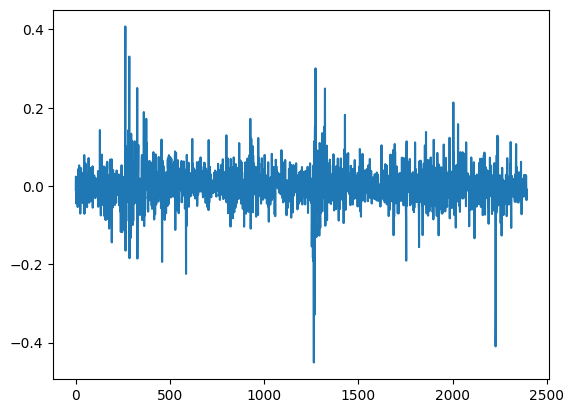

In [ ]:
dataset['RL GOL'].plot();

In [ ]:
dataset['RL GOL'].mean()

-0.001099215301284156

In [ ]:
(dataset['RL GOL'].mean() * 246) * 100

-27.040696411590236

In [ ]:
dataset['RL CVC'] = np.log(dataset['CVC'] / dataset['CVC'].shift(1))
dataset['RL WEGE'] = np.log(dataset['WEGE'] / dataset['WEGE'].shift(1))
dataset['RL MGLU'] = np.log(dataset['MGLU'] / dataset['MGLU'].shift(1))
dataset['RL TOTS'] = np.log(dataset['TOTS'] / dataset['TOTS'].shift(1))
dataset['RL BOVA'] = np.log(dataset['BOVA'] / dataset['BOVA'].shift(1))

In [ ]:
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA,RL GOL,RL CVC,RL WEGE,RL MGLU,RL TOTS,RL BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890,-0.009383,-0.013245,0.006795,0.018618,-0.031208,-0.020090
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613,0.023953,-0.013423,-0.014945,-0.013263,-0.064577,0.005597
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705,-0.044362,-0.008823,-0.011523,0.032833,-0.007096,0.033150
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477,-0.019432,-0.036090,0.016746,-0.007782,0.022954,0.007449


In [ ]:
(dataset['RL CVC'].mean() * 246) * 100

-19.552551548379505

In [ ]:
(dataset['RL WEGE'].mean() * 246) * 100

22.704838804083643

In [ ]:
(dataset['RL MGLU'].mean() * 246) * 100

15.772944134949828

In [ ]:
(dataset['RL TOTS'].mean() * 246) * 100

8.997776586433401

In [ ]:
(dataset['RL BOVA'].mean() * 246) * 100

10.153090546404938

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...
2389,2024-09-17,1.11,2.090000,53.320000,11.880000,29.980000,131.330002
2390,2024-09-18,1.14,2.070000,53.599998,11.520000,29.629999,130.050003
2391,2024-09-19,1.13,2.010000,53.259998,11.160000,29.790001,129.369995
2392,2024-09-20,1.09,1.870000,52.520000,10.350000,28.950001,127.629997


In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [ ]:
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449
...,...,...,...,...,...,...,...
2389,2024-09-17,0.074049,0.166831,9.002079,5.455676,2.523248,2.778883
2390,2024-09-18,0.076051,0.165234,9.049352,5.290352,2.493791,2.751799
2391,2024-09-19,0.075384,0.160445,8.991949,5.125028,2.507257,2.737410
2392,2024-09-20,0.072715,0.149269,8.867014,4.753051,2.436559,2.700593


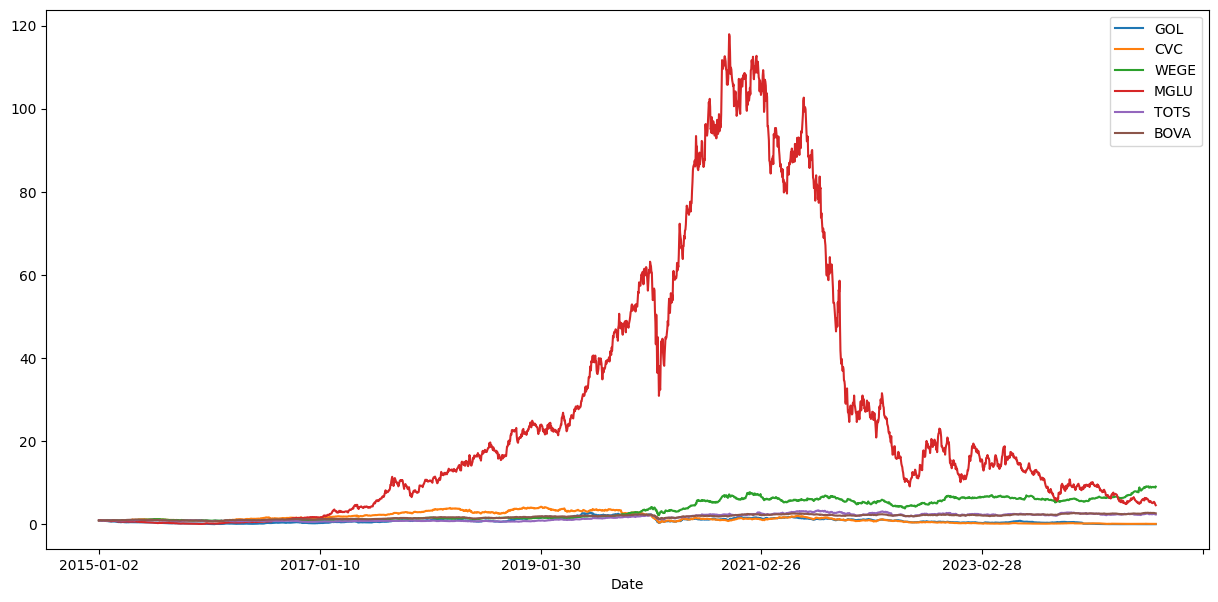

In [ ]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [ ]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [ ]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477


In [ ]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

,0
GOL,0.013649
CVC,-0.006618
WEGE,0.283180
MGLU,0.382375
TOTS,0.161206
BOVA,0.131268


In [ ]:
retorno_anual = retorno_anual * 100
retorno_anual

,0
GOL,1.364909
CVC,-0.661750
WEGE,28.318016
MGLU,38.237524
TOTS,16.120569
BOVA,13.126770


In [ ]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [ ]:
pesos_carteira1.sum()

1.0

In [ ]:
np.dot(retorno_anual, pesos_carteira1)

16.675853705381886

In [ ]:
pesos_carteira2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])

In [ ]:
pesos_carteira2.sum()

1.0

In [ ]:
np.dot(retorno_anual, pesos_carteira2)

22.574810561248917

In [ ]:
dataset = pd.read_csv('acoes.csv')

In [ ]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449


In [ ]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + dataset_normalizado['TOTS']) / 5
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110,0.994477
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612,0.978854
3,2015-01-07,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832,0.971492
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449,0.966805
...,...,...,...,...,...,...,...,...
2389,2024-09-17,0.074049,0.166831,9.002079,5.455676,2.523248,2.778883,3.444377
2390,2024-09-18,0.076051,0.165234,9.049352,5.290352,2.493791,2.751799,3.414956
2391,2024-09-19,0.075384,0.160445,8.991949,5.125028,2.507257,2.737410,3.372013
2392,2024-09-20,0.072715,0.149269,8.867014,4.753051,2.436559,2.700593,3.255722


In [ ]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

In [ ]:
dataset_normalizado.drop(['GOL', 'WEGE', 'CVC', 'MGLU', 'TOTS'], axis = 1, inplace= True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.994477
2,2015-01-06,0.985612,0.978854
3,2015-01-07,1.018832,0.971492
4,2015-01-08,1.026449,0.966805
...,...,...,...
2389,2024-09-17,2.778883,3.444377
2390,2024-09-18,2.751799,3.414956
2391,2024-09-19,2.737410,3.372013
2392,2024-09-20,2.700593,3.255722


In [ ]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

## Parte - 3 Risco de ações.